In [3]:
# Remove piplite installation attempts as they're only for JupyterLite
# Instead, use standard package imports
# If packages are not installed, you would typically install them using:
# !pip install numpy pandas matplotlib seaborn
# (uncomment the line above if needed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Instead of using js.fetch, use requests library which is standard for Python
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Use requests instead of js.fetch
response = requests.get(URL)
dataset_part_2_csv = io.BytesIO(response.content)

df = pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


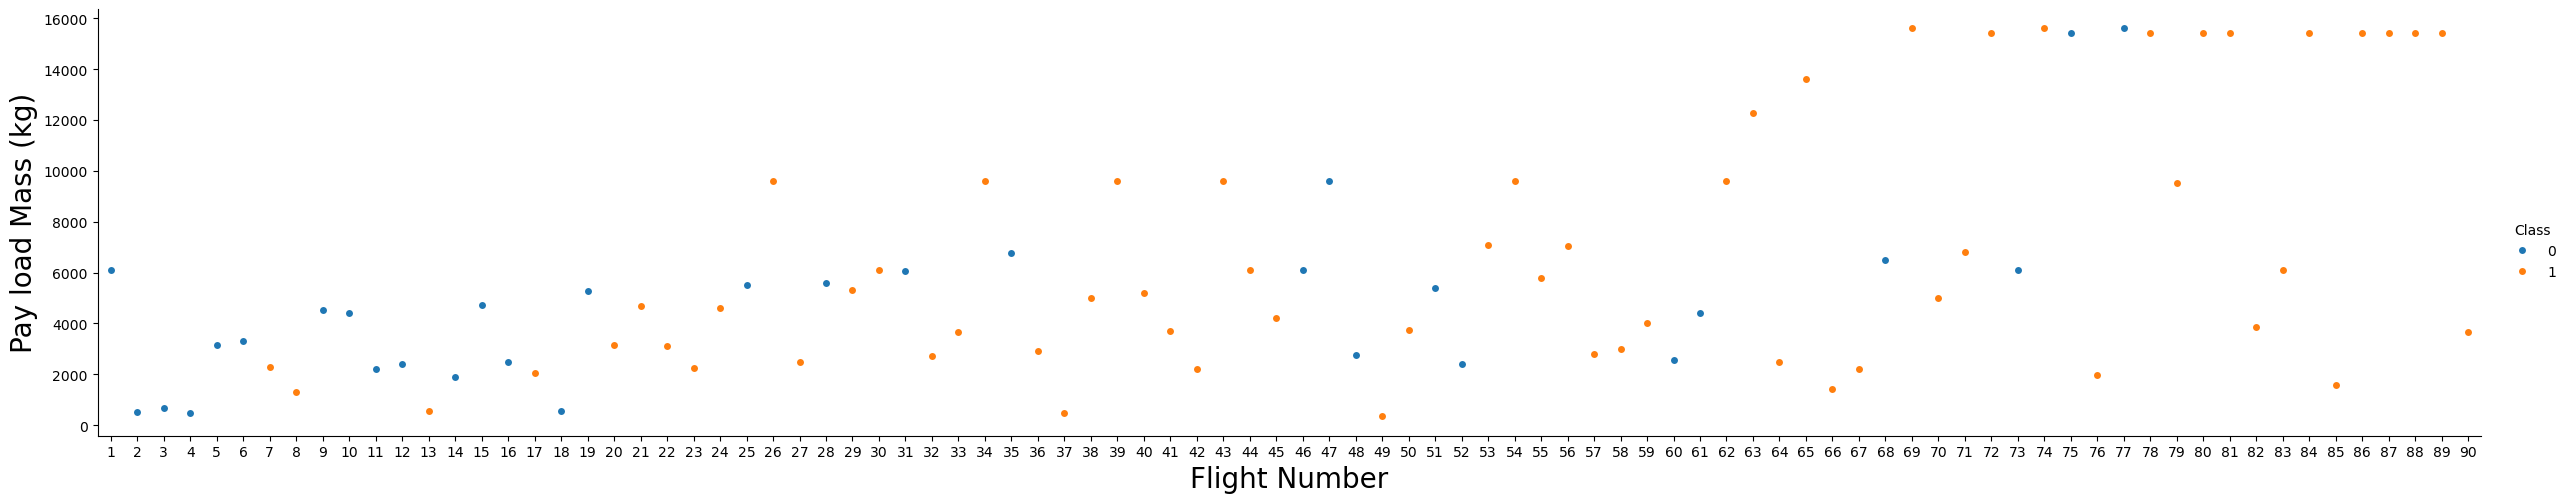

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site


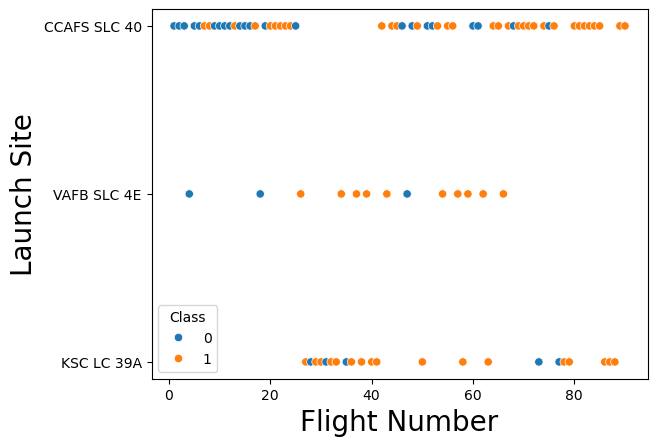

In [8]:
sns.scatterplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df
)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


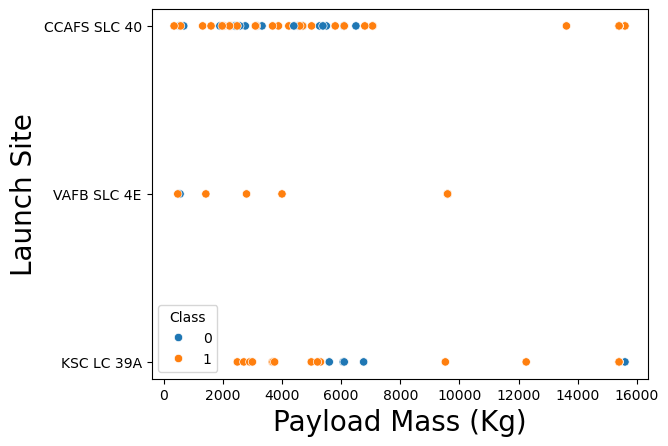

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.scatterplot(
    x="PayloadMass", 
    y="LaunchSite", 
    hue="Class", 
    data=df
)
plt.xlabel("Payload Mass (Kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


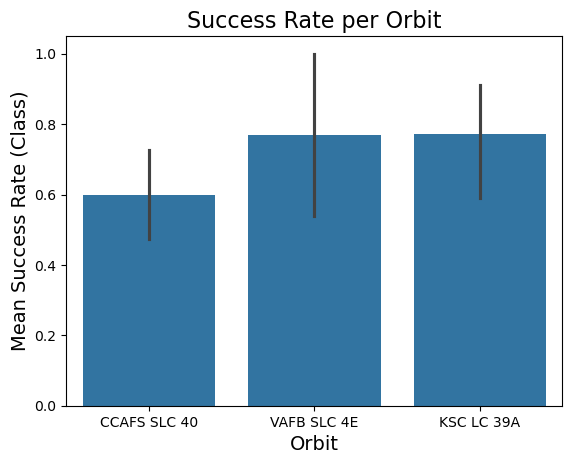

In [13]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_means = df.groupby("Orbit")["Class"].mean().reset_index()

sns.barplot(
    x="LaunchSite", 
    y="Class", 
    data=df,
    estimator=np.mean,             
)

plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Mean Success Rate (Class)", fontsize=14)
plt.title("Success Rate per Orbit", fontsize=16)
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


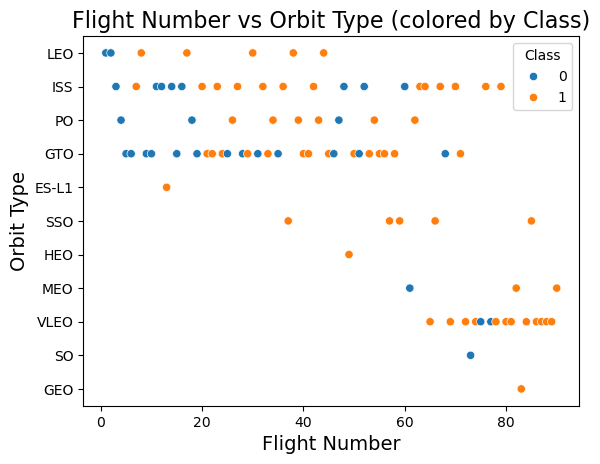

In [14]:
# For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(
    x="FlightNumber", 
    y="Orbit", 
    hue="Class", 
    data=df
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type (colored by Class)", fontsize=16)
plt.show()


### TASK  5: Visualize the relationship between Payload Mass and Orbit type

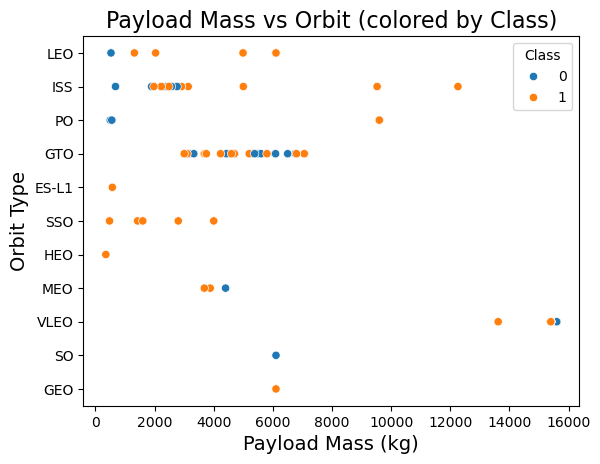

In [15]:
# # Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(
    x="PayloadMass", 
    y="Orbit", 
    hue="Class", 
    data=df
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit (colored by Class)", fontsize=16)
plt.show()




### TASK  6: Visualize the launch success yearly trend

In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

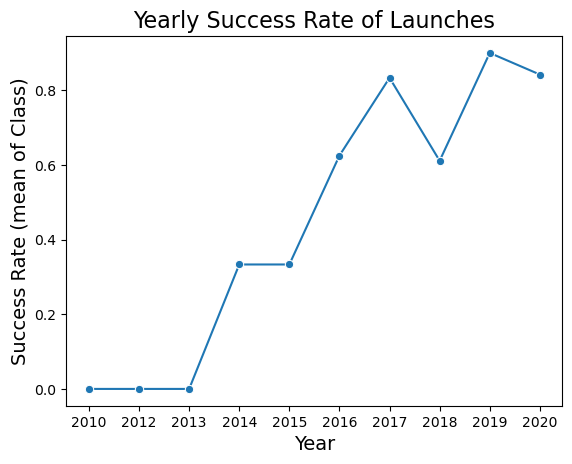

In [16]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year

yearly_success = df.groupby("Date")["Class"].mean().reset_index()

sns.lineplot(
    x="Date", 
    y="Class", 
    data=yearly_success, 
    marker="o"
)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate (mean of Class)", fontsize=14)
plt.title("Yearly Success Rate of Launches", fontsize=16)
plt.show()



## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [18]:
# HINT: Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(
    features, 
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>



In [19]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [23]:
import os
os.getcwd()   # shows current working directory
os.listdir()  # lists all files in that directory


['.ipynb_checkpoints',
 '8BitDo_Ultimate_Software_V2_V1.27',
 '8BitDo_Ultimate_Software_V2_Windows_V1.27.zip',
 'amd-software-adrenalin-edition-25.12.1-minimalsetup-251207_web.exe',
 'ChromeSetup.exe',
 'dataset_part_1.csv',
 'dataset_part_3.csv',
 'desktop.ini',
 'EpicInstaller-19.0.0-1517ed33e9864b93b4b84c36256a0ae2.msi',
 'Fantastic Beasts and Where to Find Them (2016) [2160p] [BluRay] [x265] [10bit] [5.1] [YTS.LT].torrent',
 'Fantastic Beasts The Secrets of Dumbledore (2022) [2160p] [WEBRip] [x265] [10bit] [5.1] [YTS.LT].torrent',
 'google-books-downloader-lite-1.0-installer.exe',
 'google-books-downloader-lite-1.0-installer_i7-2CN1.exe',
 'IBM Machine Learning with Python.pdf',
 'jupyter-labs-eda-dataviz-v2.ipynb',
 'KALM_NCM120HW3.docx',
 'labs-jupyter-spacex-Data wrangling-v2.ipynb',
 'Lab_edadataviz.ipynb',
 'npp.8.8.7.Installer.x64(1).exe',
 'npp.8.8.7.Installer.x64.exe',
 'OfficeSetup.exe',
 'SteamSetup.exe',
 'utorrent_installer.exe',
 'vlc-3.0.21-win64.exe',
 'voucher.pdf']